In [50]:
import pandas as pd
import numpy as np
from LogRegression import LogisiticRegression

In [55]:
#Importer les données des fichiers csv
trainData = pd.read_csv('Data/train.csv')
trainLabels = pd.read_csv('Data/train_result.csv')

In [56]:
#Mettre les points en bas de 0 à 0 et enlver les NaN
trainData[trainData < 0] = 0
trainData = trainData.dropna(axis=1)

In [57]:
#Séparer les données en training et validation pour tester les meilleurs hyperparametre
trainDataSplit = trainData.iloc[0:40000,:]
trainLabelsSplit = trainLabels.iloc[0:40000,1]
validDataSplit = trainData.iloc[40000:,:]
validLabelsSplit = trainLabels.iloc[40000:,1]

In [61]:
logReg = LogisiticRegression(trainDataSplit,trainLabelsSplit)
logReg.train(10000,256,0.05)

In [65]:
#Faire plusieurs tests pour trouver le meilleur batch size
#Importer tqdm pour suivre le progres
from tqdm import tqdm
batchSizes = [2,8,32,64,128,256,512,1024]
results = []
for i in tqdm(batchSizes):
    logReg = LogisiticRegression(trainDataSplit,trainLabelsSplit)
    logReg.train(5000,i,0.1)
    results.append(logReg.accuracy(validDataSplit,validLabelsSplit))

100%|██████████| 8/8 [30:28<00:00, 228.62s/it]


In [67]:
resultdf = pd.DataFrame([batchSizes,results],)
print(resultdf)

        0       1        2        3         4         5         6          7
0  2.0000  8.0000  32.0000  64.0000  128.0000  256.0000  512.0000  1024.0000
1  0.1463  0.1822   0.2038   0.2077    0.2052    0.2085    0.2088     0.2111


In [69]:
#Faire plusieurs tests pour trouver le meilleur nombre d'iterations et de alpha
hyperParams = [[1000,0.2],[1000,0.05],[1000,0.01],[10000,0.2],[10000,0.05],[10000,0.01],
                [20000,0.2],[20000,0.05],[20000,0.01]]

results = []
for i in tqdm(hyperParams):
    logReg = LogisiticRegression(trainDataSplit,trainLabelsSplit)
    logReg.train(i[0],64,i[1])
    results.append(logReg.accuracy(validDataSplit,validLabelsSplit))

100%|██████████| 9/9 [33:24<00:00, 222.76s/it]


In [71]:
resultdf_alpha = pd.DataFrame([hyperParams,results],)
print(resultdf_alpha)

             0             1  ...              7              8
0  [1000, 0.2]  [1000, 0.05]  ...  [20000, 0.05]  [20000, 0.01]
1       0.1955        0.1663  ...         0.2046         0.2001

[2 rows x 9 columns]


<AxesSubplot:title={'center':"Perte d'entrainement en fonction du nombre d'itération"}, xlabel='itération', ylabel='Coût (entropie croisé)'>

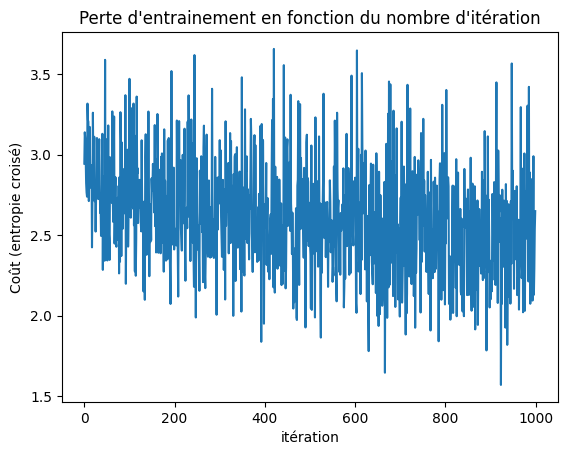

In [73]:
#Voir comment le batch size et alpha affecte le cout
logReg = LogisiticRegression(trainDataSplit,trainLabelsSplit)
logReg.train(1000,8,0.05)
logReg.plotLoss()

<AxesSubplot:title={'center':"Perte d'entrainement en fonction du nombre d'itération"}, xlabel='itération', ylabel='Coût (entropie croisé)'>

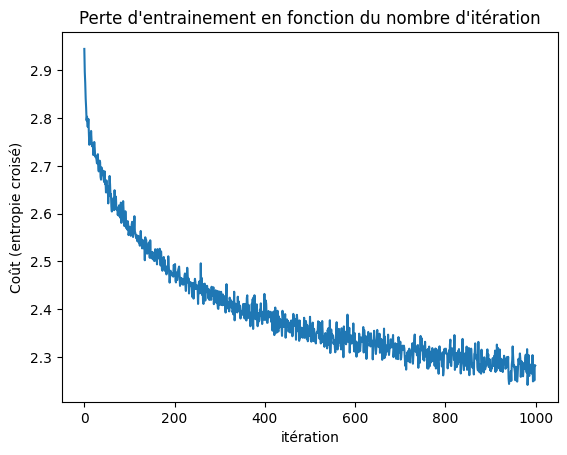

In [74]:
logReg = LogisiticRegression(trainDataSplit,trainLabelsSplit)
logReg.train(1000,1024,0.05)
logReg.plotLoss()

<AxesSubplot:title={'center':"Perte d'entrainement en fonction du nombre d'itération"}, xlabel='itération', ylabel='Coût (entropie croisé)'>

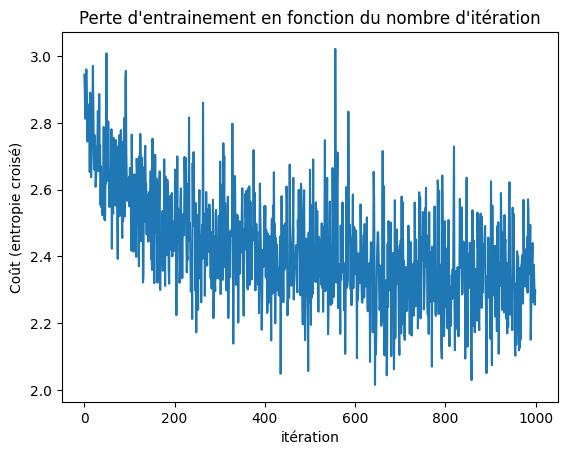

In [76]:
logReg = LogisiticRegression(trainDataSplit,trainLabelsSplit)
logReg.train(1000,64,0.2)
logReg.plotLoss()

<AxesSubplot:title={'center':"Perte d'entrainement en fonction du nombre d'itération"}, xlabel='itération', ylabel='Coût (entropie croisé)'>

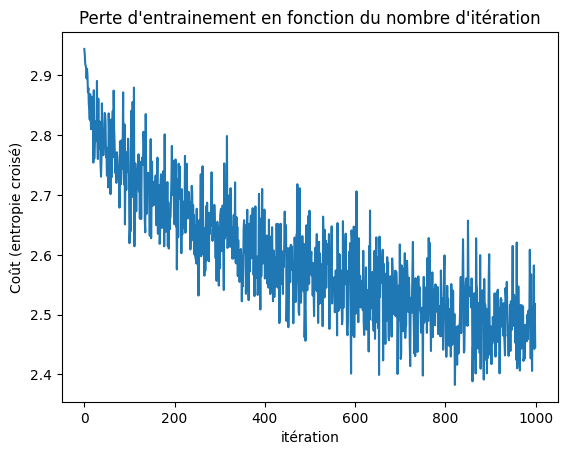

In [77]:
logReg = LogisiticRegression(trainDataSplit,trainLabelsSplit)
logReg.train(1000,64,0.01)
logReg.plotLoss()

<AxesSubplot:title={'center':"Perte d'entrainement en fonction du nombre d'itération"}, xlabel='itération', ylabel='Coût (entropie croisé)'>

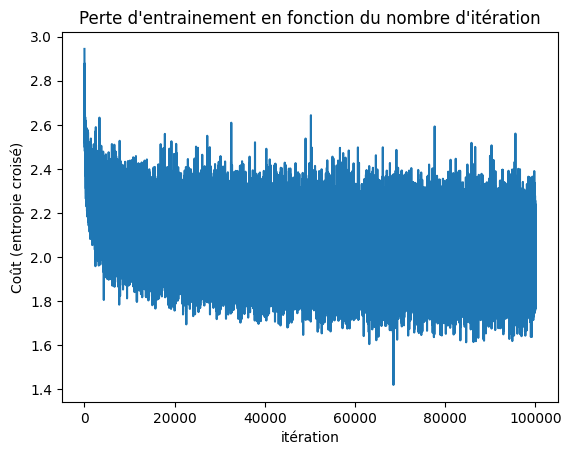

In [80]:
#Dernier training avec tous les données
logReg = LogisiticRegression(trainData,trainLabels.iloc[:,1])
logReg.train(100000,64,0.05)
#Precision sur l'ensembe d'entrainement
logReg.accuracy(trainData,trainLabels.iloc[:,1])
logReg.plotLoss()

In [81]:
logReg.accuracy(trainData,trainLabels.iloc[:,1])

0.28828

<AxesSubplot:title={'center':"Perte d'entrainement en fonction du nombre d'itération"}, xlabel='itération', ylabel='Coût (entropie croisé)'>

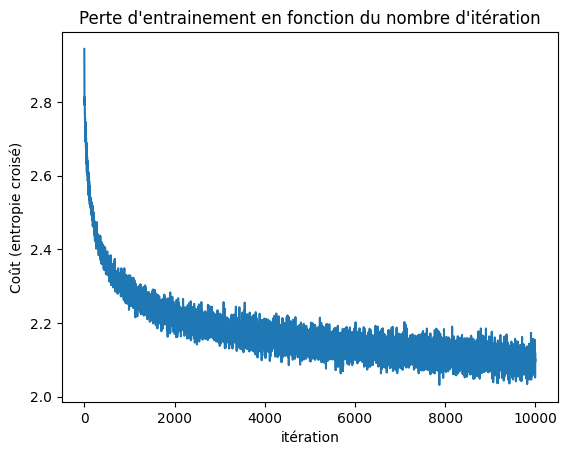

In [82]:
#Dernier training avec tous les données
logRegBatchB = LogisiticRegression(trainData,trainLabels.iloc[:,1])
logRegBatchB.train(10000,1024,0.05)
#Precision sur l'ensembe d'entrainement
logRegBatchB.accuracy(trainData,trainLabels.iloc[:,1])
logRegBatchB.plotLoss()

In [83]:
logRegBatchB.accuracy(trainData,trainLabels.iloc[:,1])

0.269

In [95]:
#Predict les test et creer les csv
testData = pd.read_csv('Data/test.csv')
testData[testData < 0] = 0
testData = testData[trainData.columns]

predictS = logReg.predict(testData)
predictB = logRegBatchB.predict(testData)

predictS = pd.DataFrame([range(10000),predictS], index = ['Index','Class']).transpose()
predictB = pd.DataFrame([range(10000),predictB], index = ['Index','Class']).transpose()

predictS.to_csv('predictions_batch8.csv',index=False)
predictB.to_csv('predictions_batch1024.csv',index=False)
